The purpose of this notebook is to explore variables 1-30 visually to see whether anything jumps out

Correlation matrix did not surface any clues on the predictability of the variables

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('df_client.csv')

In [3]:
df.head()

,Country_Code,BR Code,Period,Client,risk_rating,Self_exclude_flag,Variable_1_Y0,Variable_1_Y1,Variable_1_Y2,Variable_1_Y3,...,Variable_28_Y1,Variable_28_Y2,Variable_28_Y3,Variable_29_Y0,Variable_29_Y1,Variable_29_Y2,Variable_30_Y0,Variable_30_Y1,Variable_30_Y2,Variable_30_Y3
0,0,0,2017Q2,0,7,1,581103.4591,612122.5165,589483.6484,608043.5063,...,572312.4225,601762.9316,574251.4130,577170.3096,594024.8975,616177.8226,588163.8327,623659.1015,608794.9055,574860.551
1,0,0,2016Q1,0,7,1,608189.3682,581513.6158,609292.1500,NaN,...,608263.6088,605605.1646,NaN,581951.0166,608354.2362,623470.1198,591055.8212,592011.4052,572734.0028,NaN
2,0,0,2015Q4,0,7,1,626775.4450,620338.8464,NaN,NaN,...,621396.2940,NaN,NaN,590490.3620,620329.2616,NaN,626221.0887,572241.0321,NaN,NaN
3,0,0,2015Q2,0,7,1,613152.4469,595630.8819,NaN,NaN,...,589714.2432,NaN,NaN,580633.8747,576235.2813,NaN,619098.6619,578761.7137,NaN,NaN
4,0,1,2019Q1,1,9,0,615840.2415,603501.2067,587601.9393,610071.5454,...,607400.3547,570273.9177,573434.8221,572413.5987,618435.4264,587802.7283,NaN,NaN,NaN,NaN


In [4]:
allcols = df.columns.values

Columns seem to have prior year values for variables with Y0 being the current year value and Y1 being the prior year and so on.

For the sake of analysis we will split the variables into their respective years

In [5]:
Y0_cols = []
Y1_cols = []
Y2_cols = []
Y3_cols = []

for col in allcols[6:]:
    if col.find('Y0')>0:
        Y0_cols.append(col)
        
    if col.find('Y1')>0:
        Y1_cols.append(col)

    if col.find('Y2')>0:
        Y2_cols.append(col)

    if col.find('Y3')>0:
        Y3_cols.append(col)

In [7]:
len(Y0_cols)

30

There are 30 variables

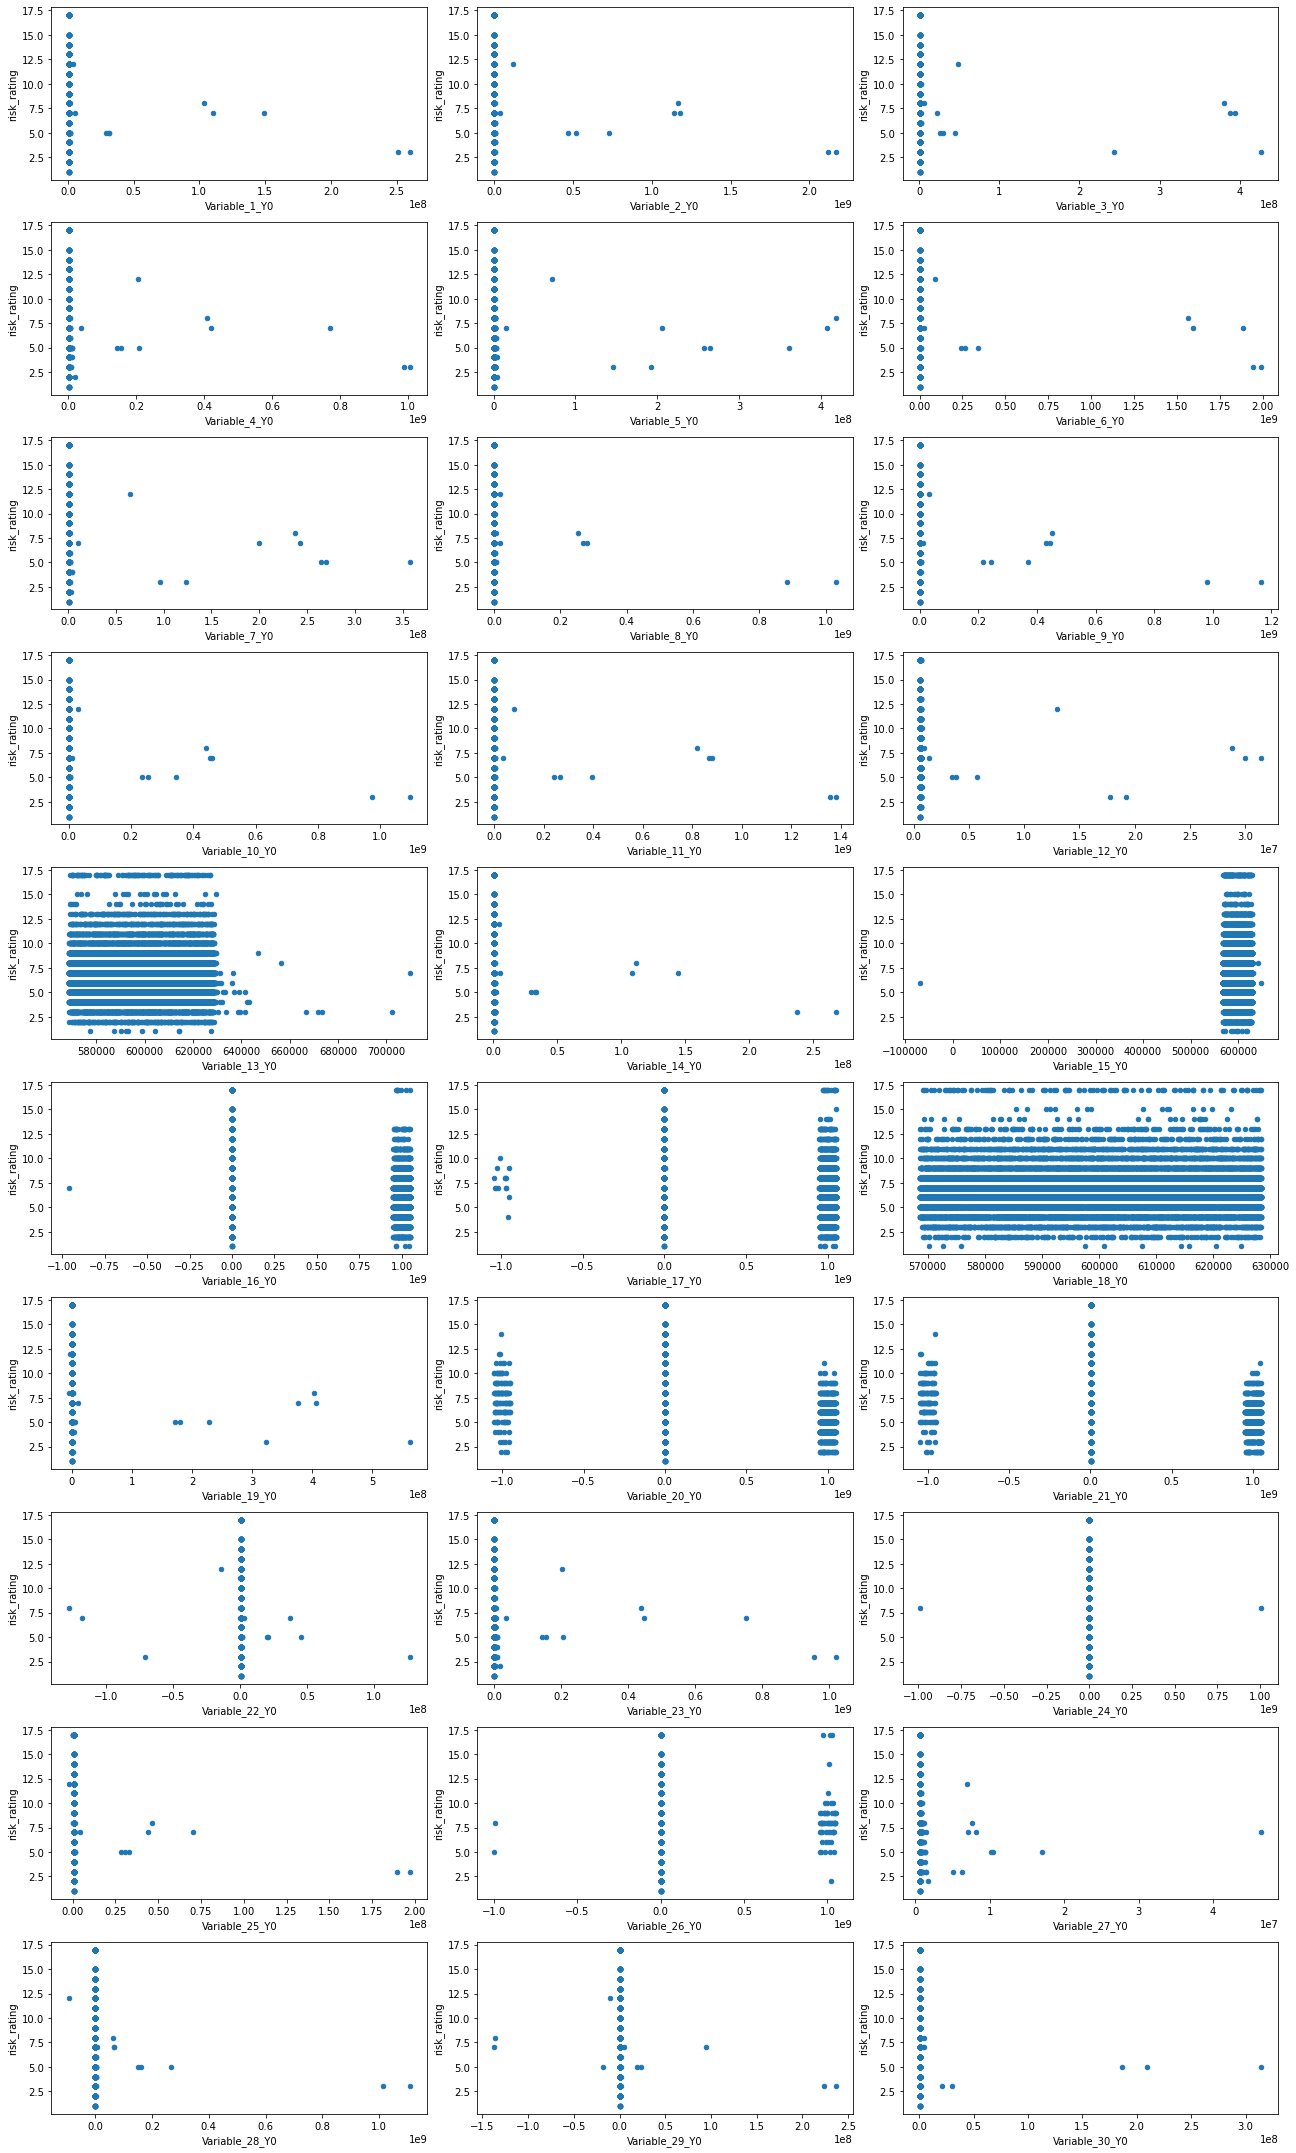

In [28]:
fig, ax = plt.subplots(10,3, figsize=(18,30))
i=0
j=0

for var in Y0_cols:
    dftemp = df.loc[:,[var, 'risk_rating']].dropna()
    x_vals = dftemp.loc[:,var].values
    y_vals = dftemp.loc[:,'risk_rating'].values
    
    dftemp.plot(kind='scatter', x=var, y='risk_rating', ax=ax[i,j])

    if j==2:
        i=i+1
        j=0
    else:
        j=j+1
        
plt.tight_layout()

Figure above shows the scatterplot of Risk Rating vs. 30 Y0 variables

The scatterplots do not show any relationship between Risk Rating and the 30 Y0 Variables

In [30]:
for var in Y0_cols:
    arr = df.loc[:,var].dropna().values

    minarr = np.min(arr)
    maxarr = np.max(arr)

    if minarr > 0:
        count, division = np.histogram(arr, bins=[minarr, 0, 1, maxarr])
    else:
        count, division = np.histogram(arr, bins=[0, 1, maxarr])

    print(var, count, division)

Variable_1_Y0 [    0 27627] [0.00000000e+00 1.00000000e+00 2.60414271e+08]
Variable_2_Y0 [    0 27843] [0.00000000e+00 1.00000000e+00 2.16694398e+09]
Variable_3_Y0 [    0 27349] [0.0000000e+00 1.0000000e+00 4.2723547e+08]
Variable_4_Y0 [    0 27405] [0.00000000e+00 1.00000000e+00 1.00569929e+09]
Variable_5_Y0 [    0 27435] [0.00000000e+00 1.00000000e+00 4.18339408e+08]
Variable_6_Y0 [    0 27747] [0.00000000e+00 1.00000000e+00 1.99318388e+09]
Variable_7_Y0 [    0 27688] [0.00000000e+00 1.00000000e+00 3.58083645e+08]
Variable_8_Y0 [    0 27455] [0.00000000e+00 1.00000000e+00 1.03005805e+09]
Variable_9_Y0 [    0 27262] [0.0000000e+00 1.0000000e+00 1.1656878e+09]
Variable_10_Y0 [    0 27399] [0.00000000e+00 1.00000000e+00 1.09613052e+09]
Variable_11_Y0 [    0 27508] [0.0000000e+00 1.0000000e+00 1.3793473e+09]
Variable_12_Y0 [    0 27279] [0.00000000e+00 1.00000000e+00 3.14501628e+07]
Variable_13_Y0 [    0 27400] [0.00000000e+00 1.00000000e+00 7.09846152e+05]
Variable_14_Y0 [    0 27624] [

When inspecting the scatterplots it seemed like many values were zeroes. The code above tries to determine the number of zero values

Upon inspecting the output it appears that values close to 0 in scatterplot are actually above 0

C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppDa

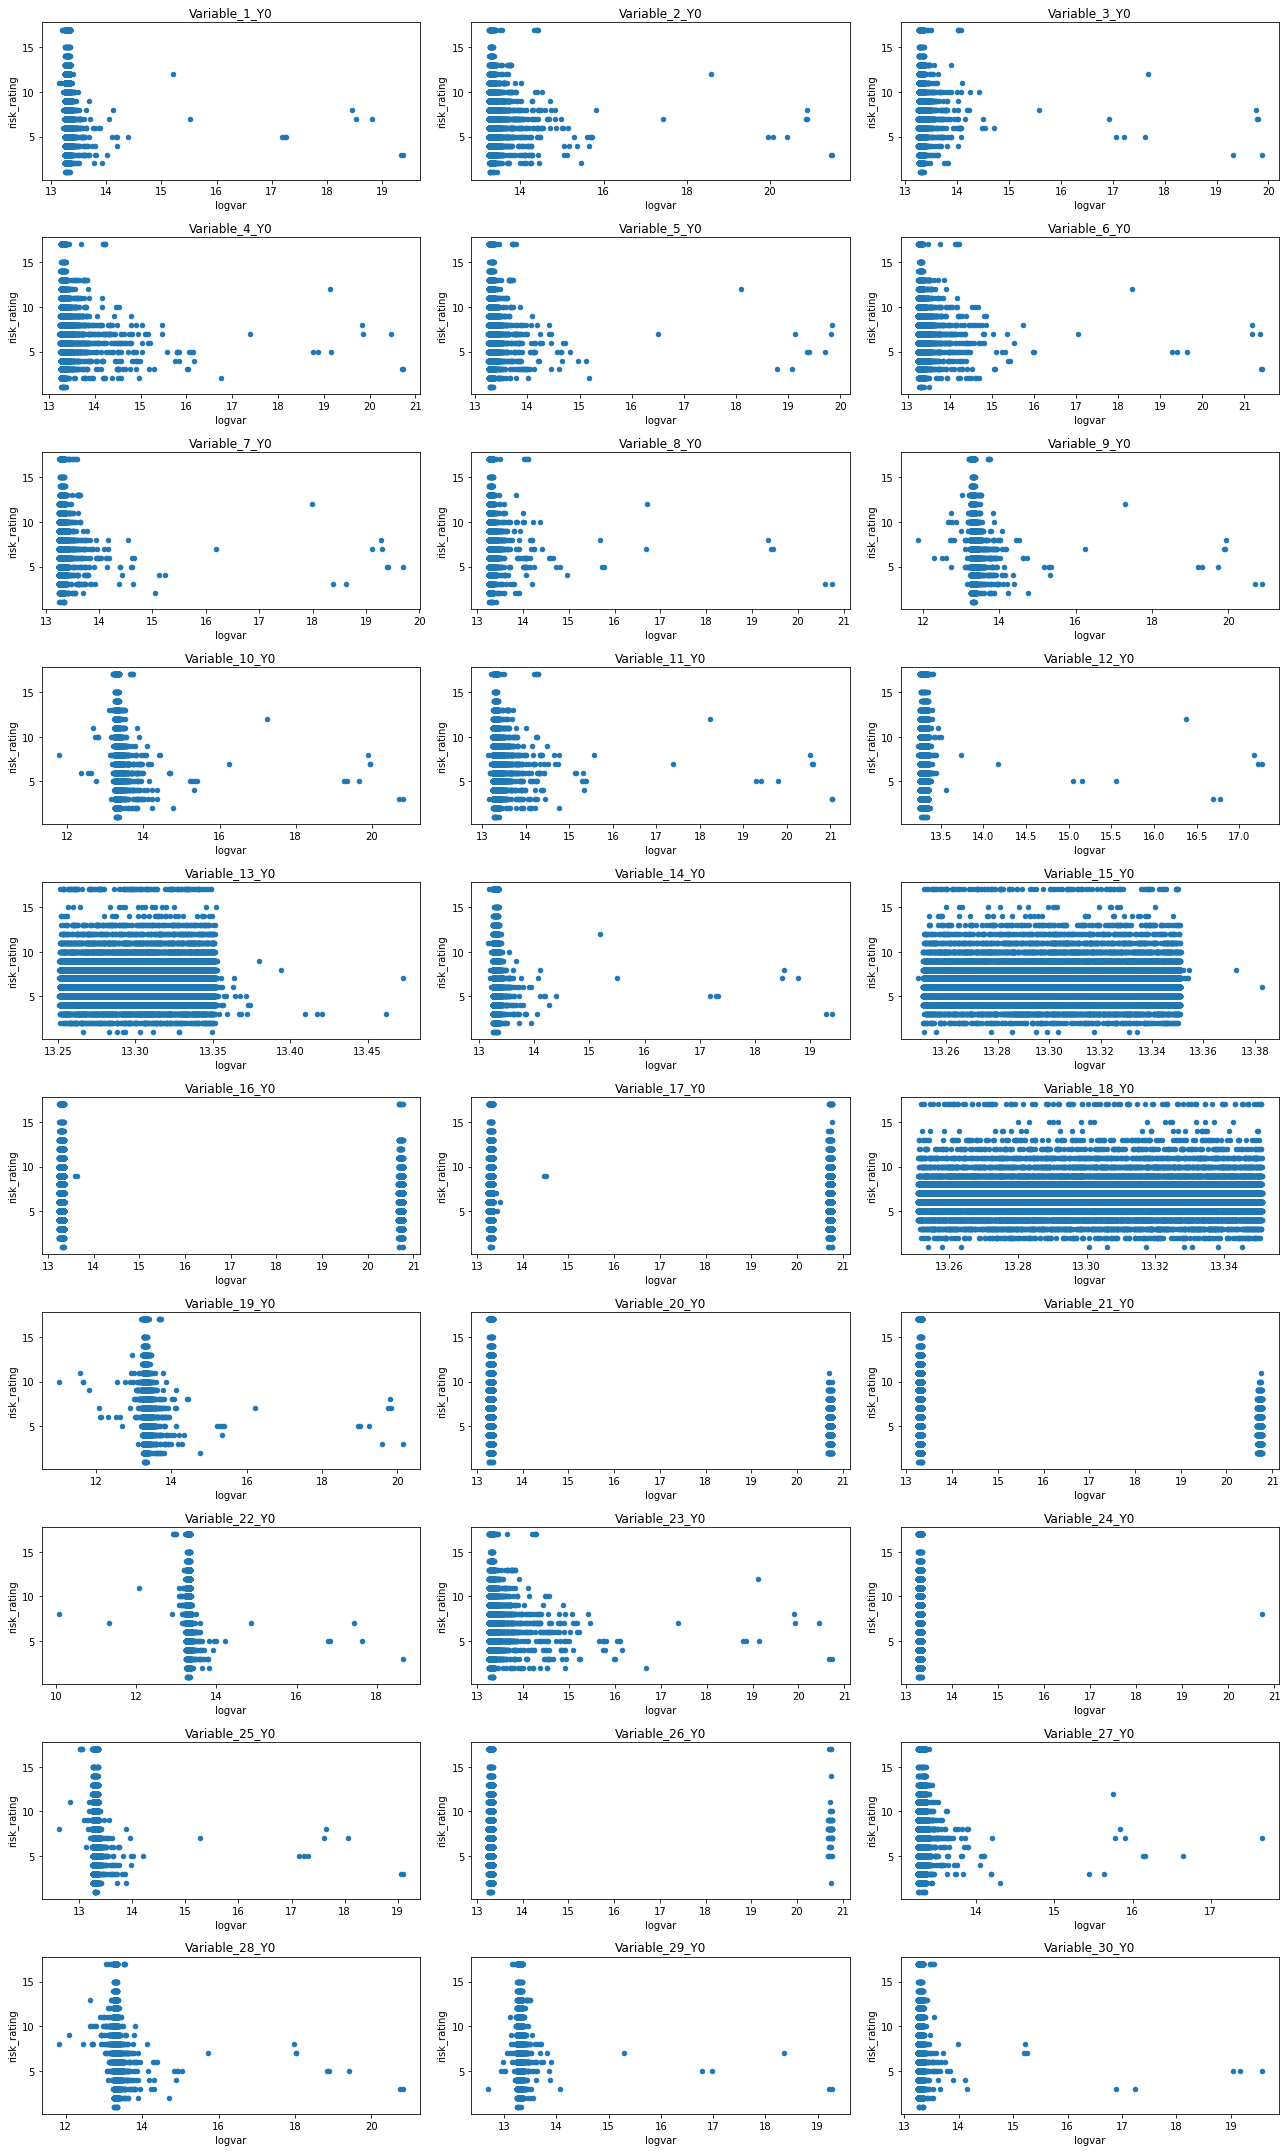

In [37]:
fig, ax = plt.subplots(10,3, figsize=(18,30))
i=0
j=0

for var in Y0_cols:
    dftemp = df.loc[:,[var, 'risk_rating']].dropna()
    dftemp.loc[:,'logvar'] = np.log(dftemp.loc[:,var].values)
    dftemp.plot(kind='scatter', x='logvar', y='risk_rating', ax=ax[i,j], title=var)

    if j==2:
        i=i+1
        j=0
    else:
        j=j+1
        
plt.tight_layout()

To get a better sense of the distribution we take the log of the variables

The chart above shows the Risk Rating vs. log of Y0 variables

The values are not as close to zero as in the previous chart

C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppDa

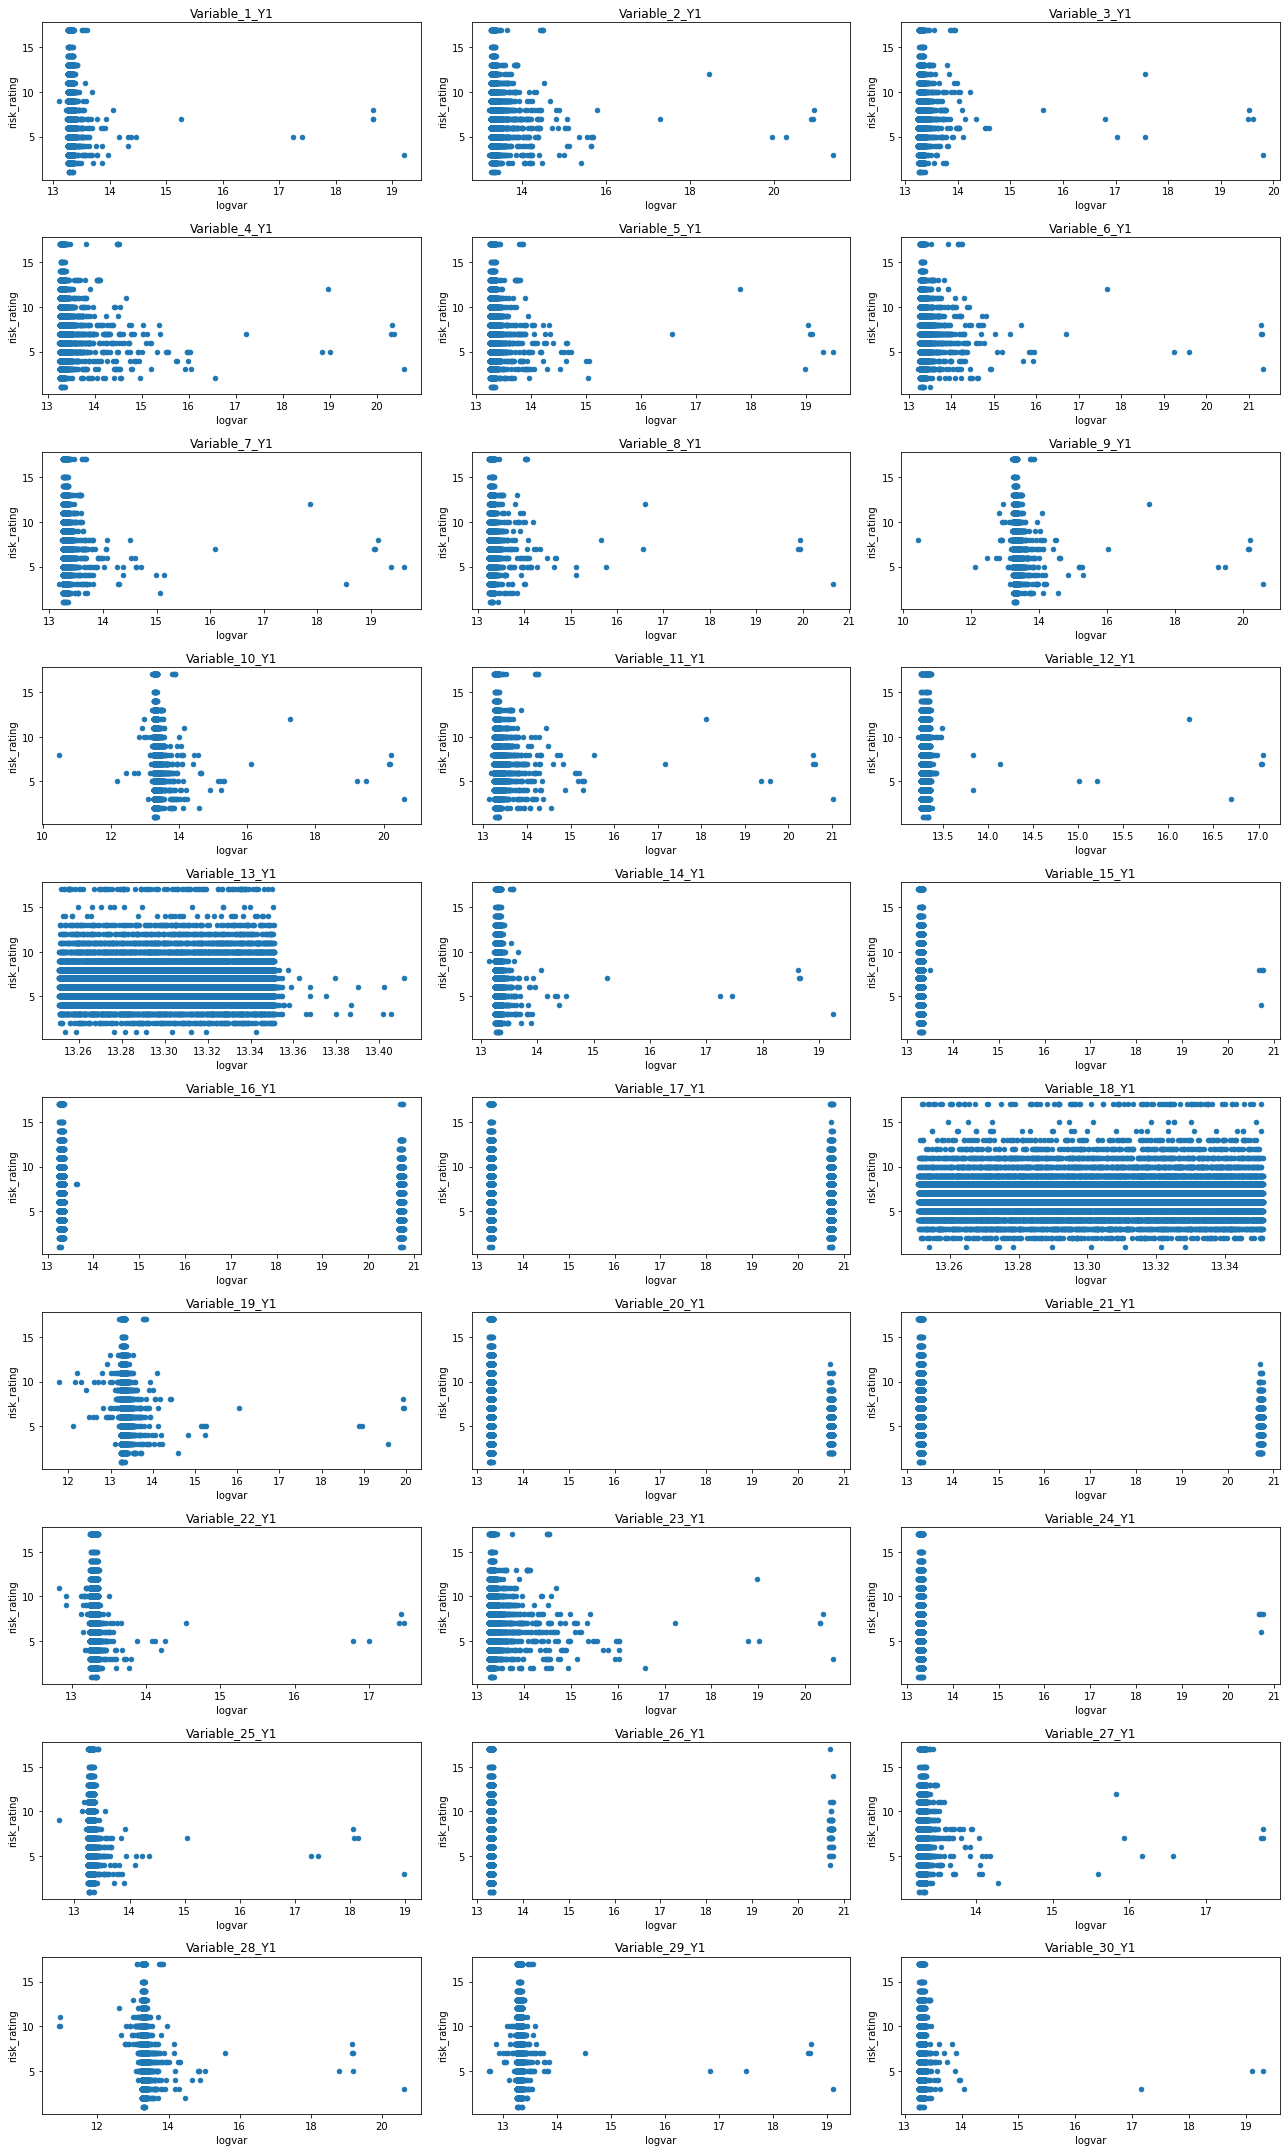

In [38]:
fig, ax = plt.subplots(10,3, figsize=(18,30))
i=0
j=0

for var in Y1_cols:
    dftemp = df.loc[:,[var, 'risk_rating']].dropna()
    dftemp.loc[:,'logvar'] = np.log(dftemp.loc[:,var].values)
    dftemp.plot(kind='scatter', x='logvar', y='risk_rating', ax=ax[i,j], title=var)

    if j==2:
        i=i+1
        j=0
    else:
        j=j+1
        
plt.tight_layout()

Chart above shows the relation between Risk Rating and log of Y1 variables

C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppDa

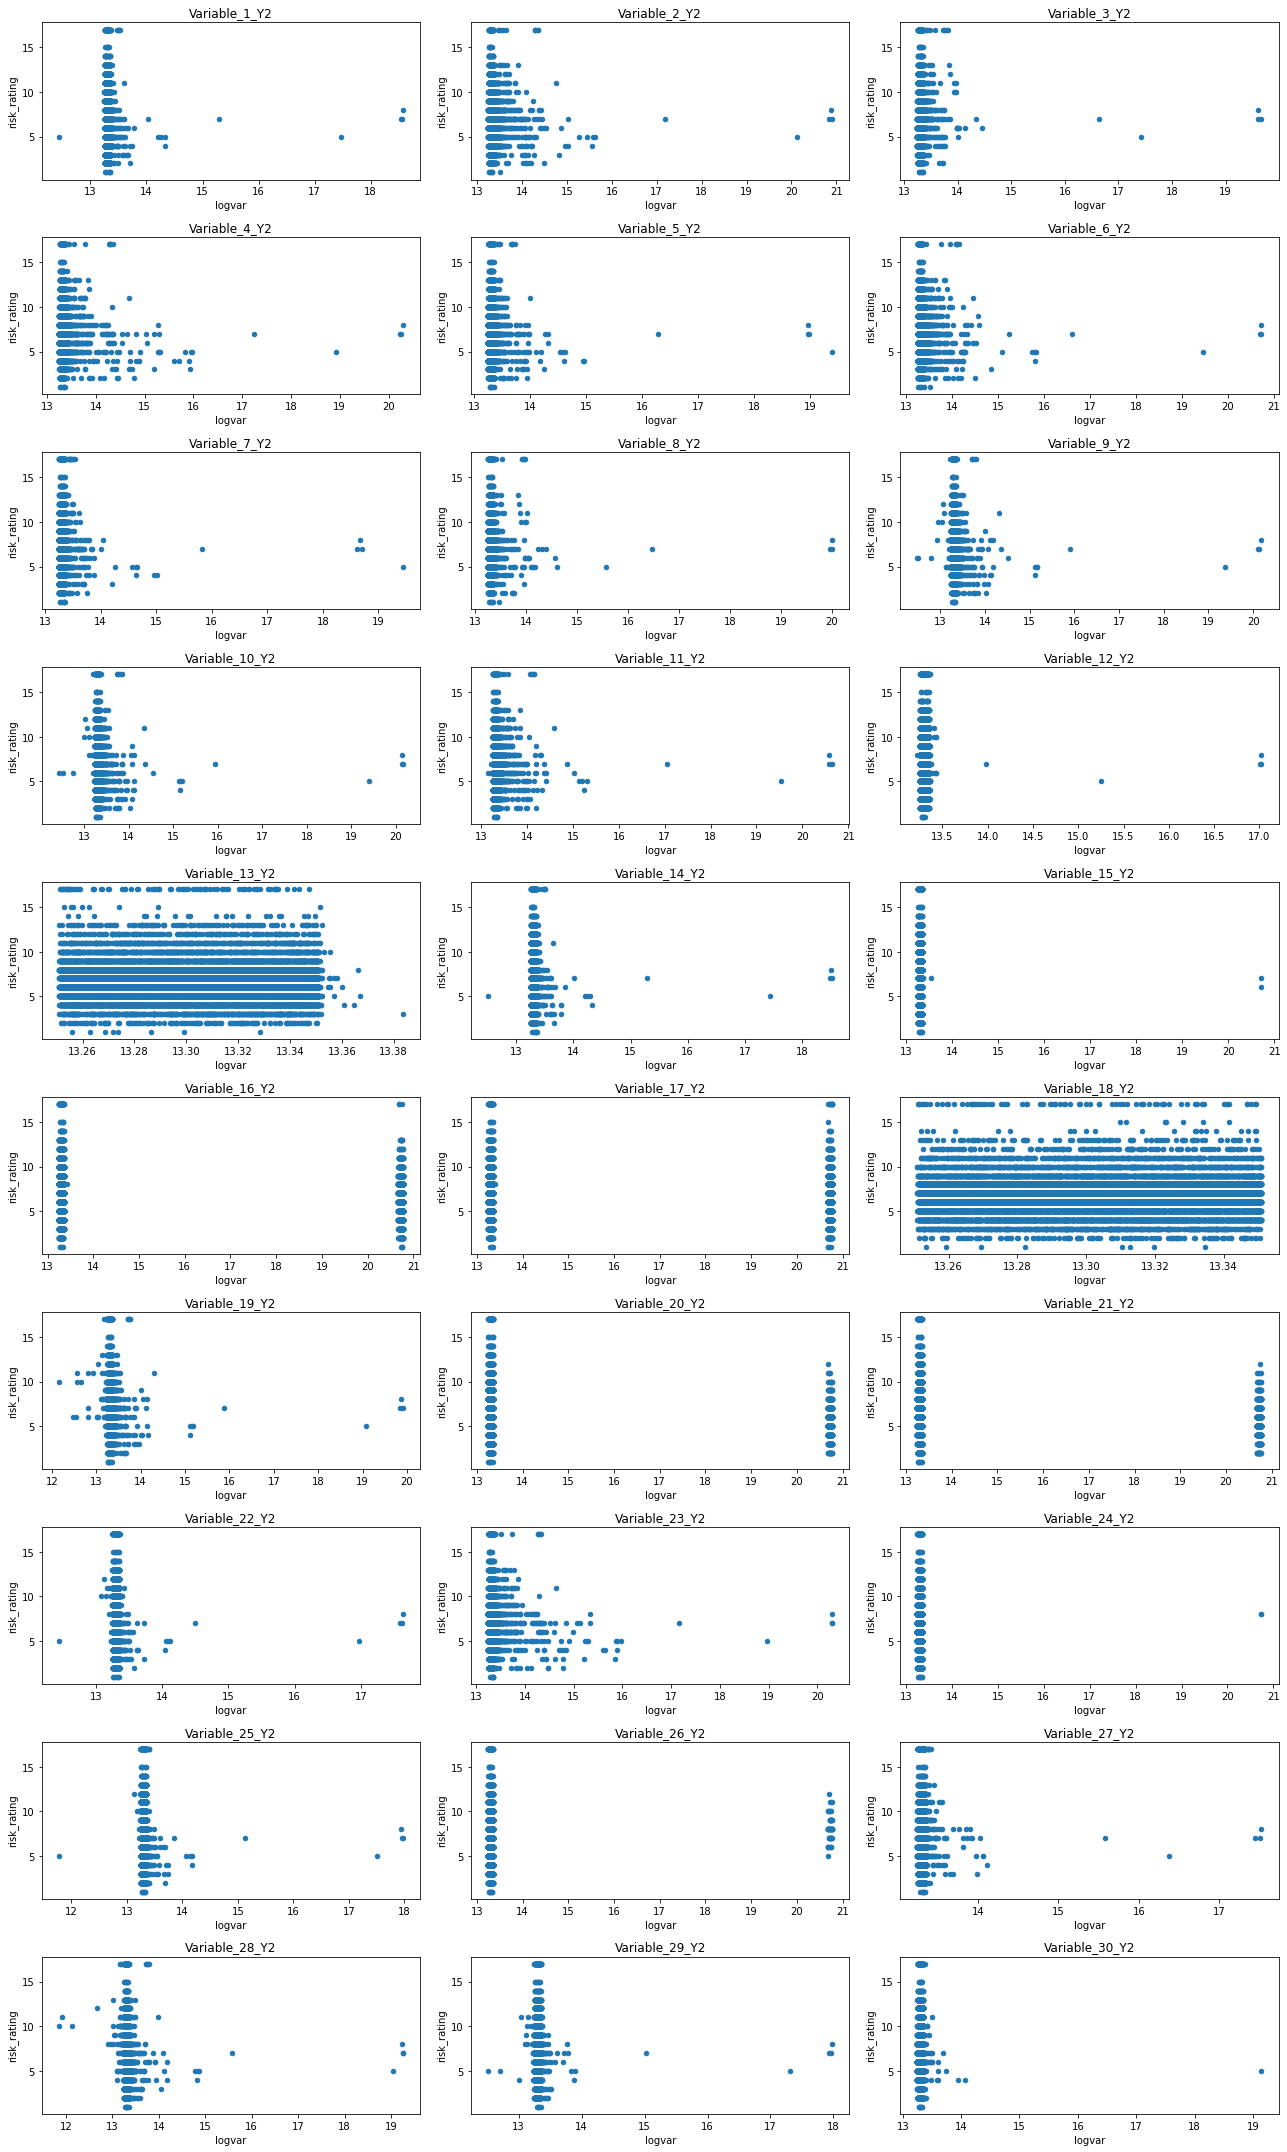

In [39]:
fig, ax = plt.subplots(10,3, figsize=(18,30))
i=0
j=0

for var in Y2_cols:
    dftemp = df.loc[:,[var, 'risk_rating']].dropna()
    dftemp.loc[:,'logvar'] = np.log(dftemp.loc[:,var].values)
    dftemp.plot(kind='scatter', x='logvar', y='risk_rating', ax=ax[i,j], title=var)

    if j==2:
        i=i+1
        j=0
    else:
        j=j+1
        
plt.tight_layout()

Chart above shows the relation between Risk Rating and log of Y2 variables

C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
C:\Users\rsivasankaran\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


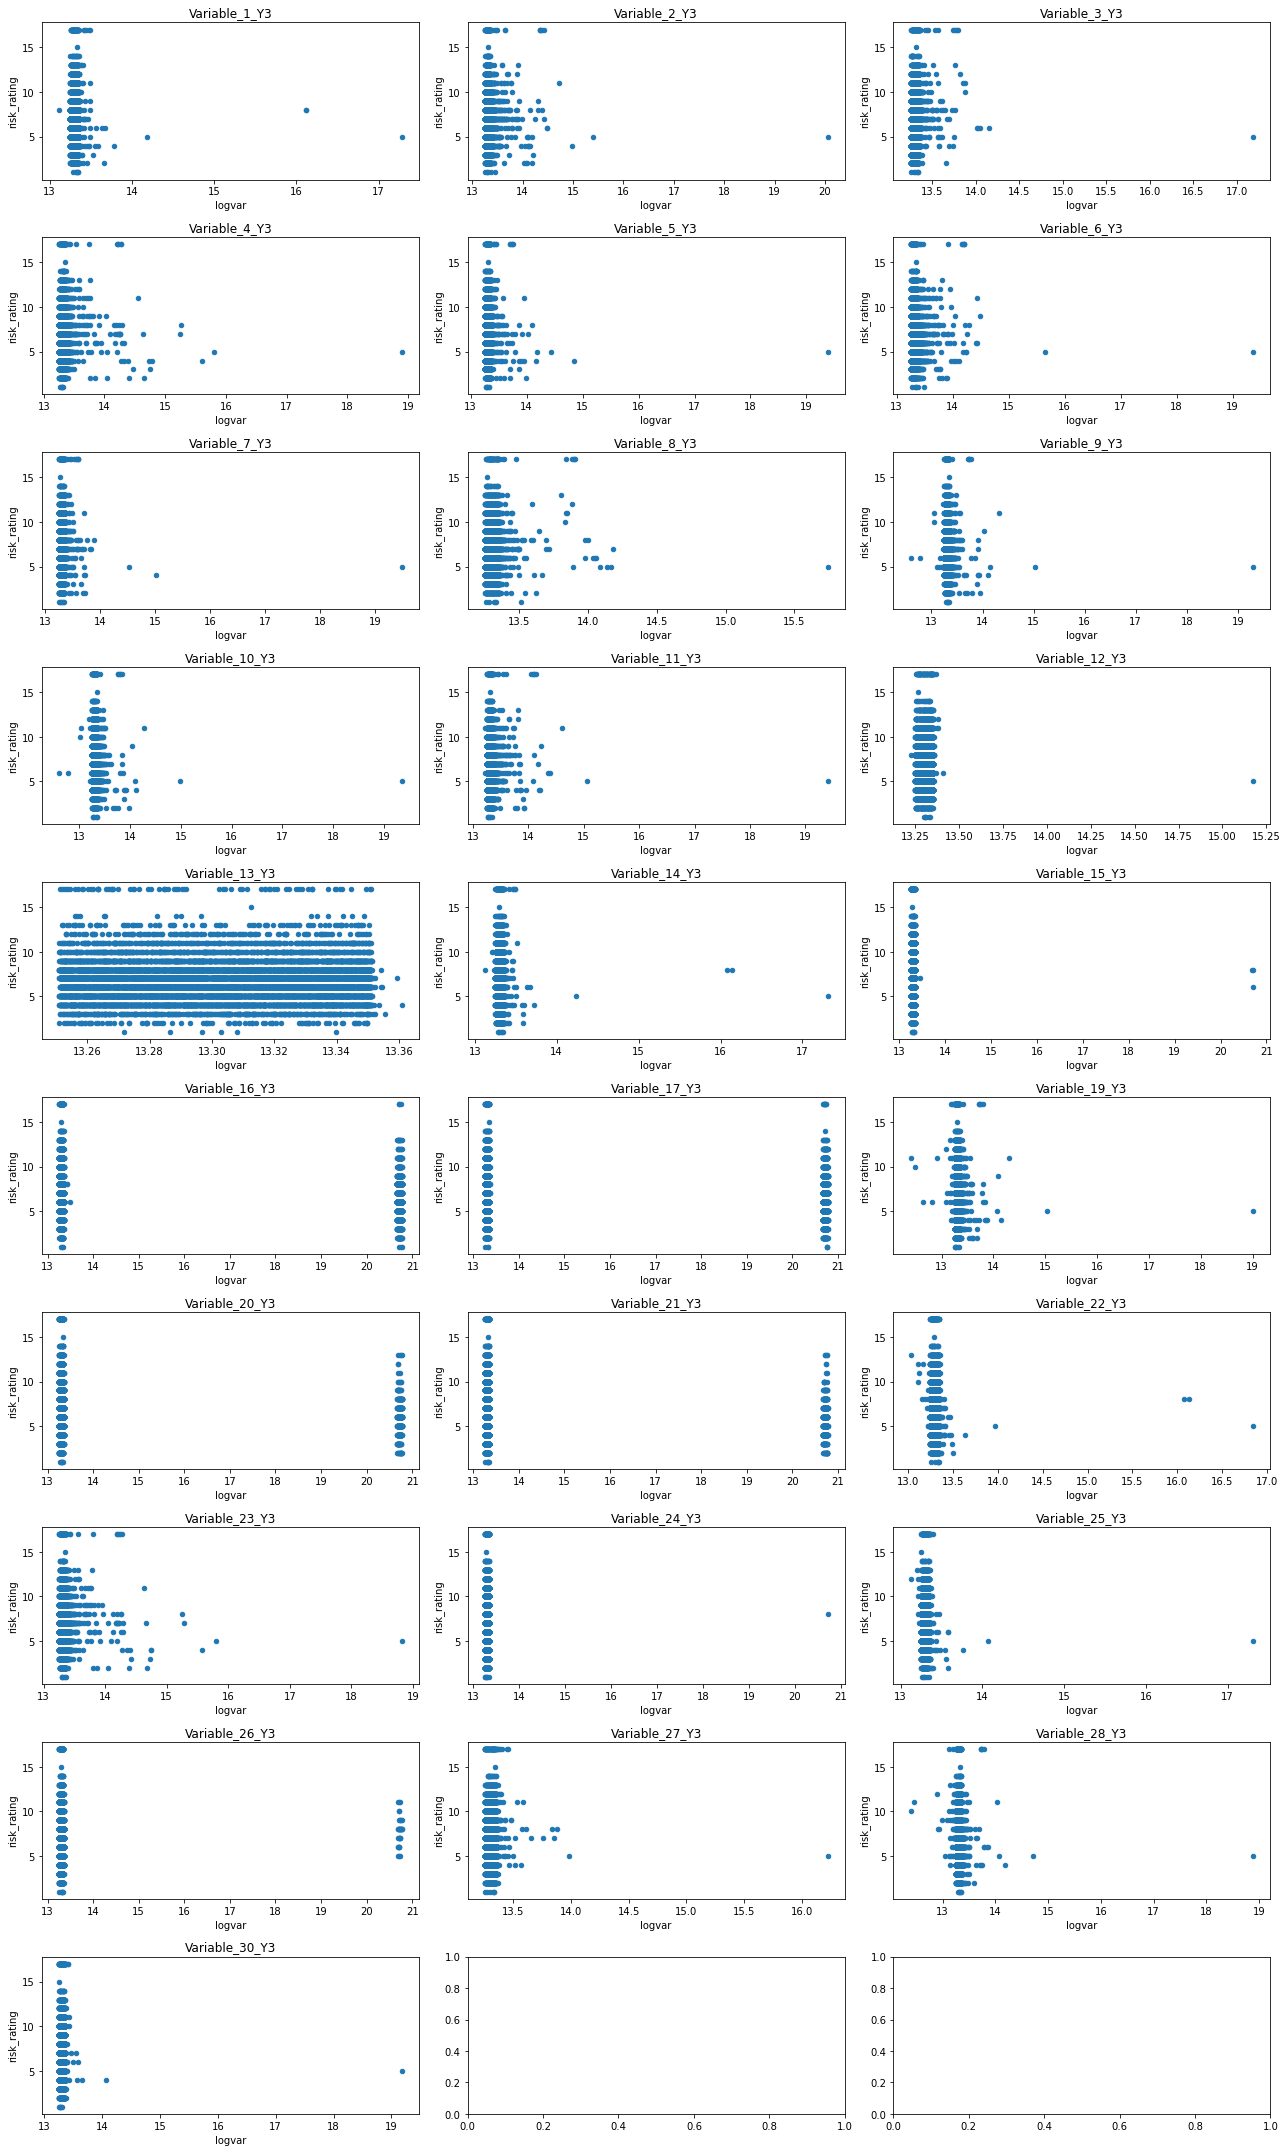

In [40]:
fig, ax = plt.subplots(10,3, figsize=(18,30))
i=0
j=0

for var in Y3_cols:
    dftemp = df.loc[:,[var, 'risk_rating']].dropna()
    dftemp.loc[:,'logvar'] = np.log(dftemp.loc[:,var].values)
    dftemp.plot(kind='scatter', x='logvar', y='risk_rating', ax=ax[i,j], title=var)

    if j==2:
        i=i+1
        j=0
    else:
        j=j+1
        
plt.tight_layout()

Chart above shows the relation between Risk Rating and log of Y3 variables

There is no linear relationship or non-linear relationship between risk rating and any of the variables provided